In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Coefficients (m and c) are :  0.9400000000000003 -3.552713678800501e-15
R^2 Value :  1.0
Variance between actual and predicted outputs are :  4.210735802469137 4.210735802469138


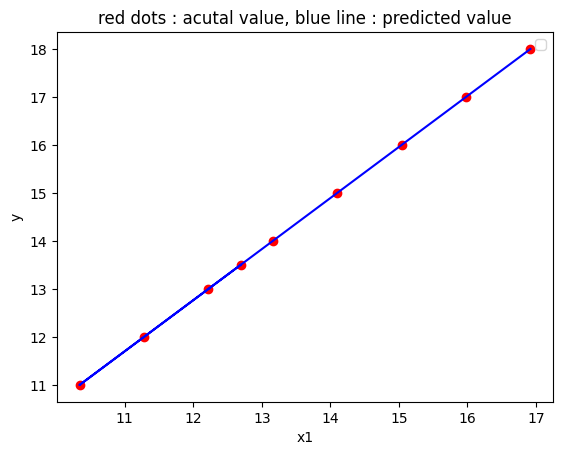

In [16]:
# Put values of x1 and y in a numpy array.
x1 = np.array([13.5, 11, 12, 13, 14, 15, 16, 17, 18])
y = np.array([12.69, 10.34, 11.28, 12.22, 13.16, 14.1, 15.04, 15.98, 16.92])

# Linear regression equation : y = mx + c.
# Here, m = summation(x - meanX)(y - meanY) / (summation((x - xmean)^2))
mean_x = x1.mean()
mean_y = y.mean()

m = np.sum((x1 - mean_x) * (y - mean_y))
m /= np.sum((x1 - mean_x) * (x1 - mean_x))

# To find c, c = mean_y - mean_x * m
c = mean_y - mean_x * m

print("Coefficients (m and c) are : ", m, c)

# Plotting on the graph.
predicted_values = [] * len(y)
for x in x1:
    predicted_values.append(m * x + c)

# Actual data points.
plt.scatter(y, x1, color="red")

# Predicted linear regression line.
plt.title("red dots : acutal value, blue line : predicted value")
plt.plot(predicted_values, x1, color="blue")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()

# Calculation of R^2.
ssr = np.sum((predicted_values - y) ** 2)
sst = np.sum((y - mean_y) ** 2)

r2 = 1 - (ssr / sst)
print("R^2 Value : ", r2)

print("Variance between actual and predicted outputs are : ", np.var(y), np.var(predicted_values))

#### Question 1> Perform linear regression and calculate coefficients, R^2 value and variance score.

##### Given Table : 
x1 13.5  11 12 13 14 15 16 17 18 \
y  12.69 10.37, 11.28 12.22 13.16, 14.1 15.04, 15.98, 16.92

In [17]:
# Multiple linear regression problem.
# x1 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
# x2 = [20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 0.5, -2, -4, -7, -9. -11]
# y = [-11, -4.9, 1.2, 7.3, 13.4, 19.5, 25.6, 31.7, 37.8, 43.9, 49.1, 56.1, 62.2, 70.1, 76.2, 82.8]

In [18]:
x1 = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])  
x2 = np.array([20,18,16,16,12,10,8,6,4,2,0.5, -2,-4,-7,-9,-11]) 
h = np.array([x1, x2])

y = np.array([-11, -4.9, 1.2, 7.3, 13.4,19.5,25.6, 31.7, 37.8, 43.9, 49.1, 56.1, 62.2, 70.1, 76.2, 82.3])

# Create linear regression object.
from sklearn import linear_model as lm
from sklearn import metrics as mts
from sklearn.model_selection import train_test_split as tts

lr = lm.LinearRegression()

# Separate into training and testing data.
htrain, htest, ytrain, ytest = tts(h.T, y, test_size=0.4, random_state=1)

# Train the model 
lr.fit(htrain, ytrain)

# Get coefficients.
r_coeff = lr.coef_

print("Regression coefficients : ", r_coeff)
print("Variance score (1 -> prefect) ", lr.score(htest, ytest))


Regression coefficients :  [ 2.5 -1.8]
Variance score (1 -> prefect)  0.9963961329934978


Text(0.5, 1.0, 'Residual errors')

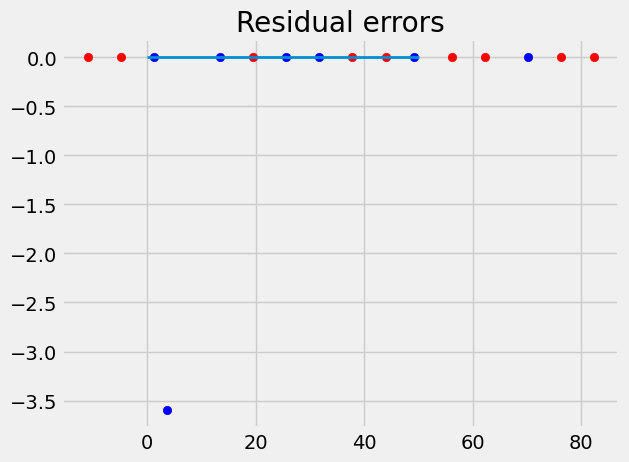

In [19]:
plt.style.use("fivethirtyeight")
plt.scatter(lr.predict(htrain), lr.predict(htrain) - ytrain, color="red", label='Training data')
plt.scatter(lr.predict(htest), lr.predict(htest) - ytest, color="blue", label="Test data")

# Plot lines for residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.title("Residual errors")